In [2]:
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

filename = 'healthcare-dataset-stroke-data.csv'
cols = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','avg_glucose_level','bmi', 'smoking_status','stroke']

df = pd.read_csv(filename, usecols=cols)

In [3]:
# Check datatype each column of dataframe
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df: DataFrame, numeric_df: DataFrame):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")

printColumnTypes(cat_df, num_df)

df.info()

Non-Numeric columns:
gender
ever_married
work_type
Residence_type
smoking_status

Numeric columns:
age
hypertension
heart_disease
avg_glucose_level
bmi
stroke
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
def printUniqueValue(cols: list):
    for col in cols:
        print(f"{col}: {df[col].unique()}")
        
non_numeric_col = ['gender','ever_married','work_type','Residence_type', 'smoking_status']

printUniqueValue(non_numeric_col)

df[df['smoking_status'] == 'Unknown']

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5098,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [5]:
# Data cleansing
modus_smoking_status = df['smoking_status'].max()
df['smoking_status'] = df['smoking_status'].apply(lambda x: modus_smoking_status if x == 'Unknown' else x)

print(df['smoking_status'].unique())

num_gender = { 'Female': 0, 'Male': 1 }
num_ever_married = { 'No': 0, 'Yes': 1 }
num_smoking_status = {
    'formerly smoked': 0,
    'never smoked': 1,
    'smokes': 2,
}

num_work_type = {
    'children': 0,
    'Govt_job': 1,
    'Never_worked': 2,
    'Private': 3,
    'Self-employed': 4,
}
num_residence_type = {
    'Urban': 0,
    'Rural': 1
}

# Remove Other value in gender column
df = df[df['gender'] != 'Other']

# Label Encoding
df['gender'] = df['gender'].replace(num_gender)
df['ever_married'] = df['ever_married'].replace(num_ever_married)
df['Residence_type'] = df['Residence_type'].replace(num_residence_type)
df['smoking_status'] = df['smoking_status'].replace(num_smoking_status)
df['work_type'] = df['work_type'].replace(num_work_type)

mean_bmi_replacement_value = df.loc[:,'bmi'].dropna().mean()

df['bmi'] = df.loc[:, 'bmi'].fillna(mean_bmi_replacement_value)

['formerly smoked' 'never smoked' 'smokes']


In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,0,228.69,36.60000,0,1
1,0,61.0,0,0,1,4,1,202.21,28.89456,1,1
2,1,80.0,0,1,1,3,1,105.92,32.50000,1,1
3,0,49.0,0,0,1,3,0,171.23,34.40000,2,1
4,0,79.0,1,0,1,4,1,174.12,24.00000,1,1


In [7]:
print(df['stroke'].value_counts() / len(df))

0    0.951262
1    0.048738
Name: stroke, dtype: float64


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

### **Membuat function melakukan visualisasi distribusi kelas**

Visualisasi dilakukan menggunakan library  `Matplotlib`
Untuk mempermudah akan dibentuk dalam 1 function 
```python 
def viz_distribution_of_class(X,y, col_idx, title) 
```

| Parameter | Deskripsi | Data Type |
| --------- | --------- | --------- |
| X | Fitur pada dataset | Numpy Array | 
| y | Kelas pada dataset | Numpy Array |
| col_idx | index column yang merepresentasikan dataset | Tupple [0, 1] |
| title | Title Visualisasi (default "") | String / None |


In [34]:
from collections import Counter
from matplotlib import pyplot
from numpy import where


def viz_distribution_of_class(X, y, col_idx, title="") -> None:
    plt = pyplot
    counter = Counter(y)
    print(counter)
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y != label)[0]
        plt.title(title)
        plt.scatter(X[row_ix, col_idx[0]], X[row_ix, col_idx[1]], label=str(label))
        plt.legend()
    plt.show()

### Visualisasi Distribusi kelas sebelum dilakukan resampling

Counter({0: 4860, 1: 249})


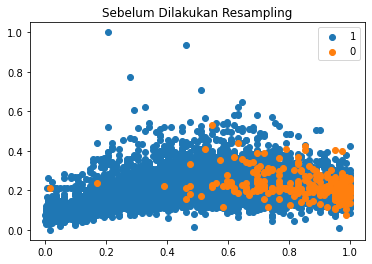

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

viz_distribution_of_class(X_scaled, y, [1,8], title="Sebelum Dilakukan Resampling")

### Visualisasi Distribusi Kelas Setelah dilakukan SMOTE

Counter({1: 4860, 0: 4860})


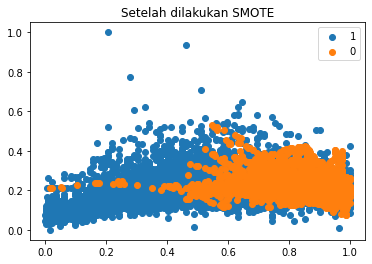

In [43]:
from imblearn.over_sampling import SMOTE

sm_oversampl = SMOTE(random_state=42)
X_oversampling, y_oversampling = sm_oversampl.fit_resample(X_scaled, y)

viz_distribution_of_class(X_oversampling, y_oversampling, [1,8], title="Setelah dilakukan SMOTE")

### Visualisasi Distribusi Kelas Setelah dilakukan SMOTE + TomekLink

Counter({0: 4860, 1: 4791})


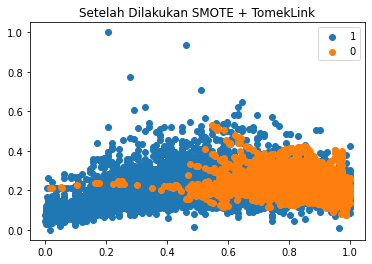

In [44]:
from imblearn.under_sampling import TomekLinks


tomekLink = TomekLinks()
X_tomekLink, y_tomekLink = tomekLink.fit_resample(X_oversampling, y_oversampling)

viz_distribution_of_class(X_tomekLink, y_tomekLink, [1,8], title="Setelah Dilakukan SMOTE + TomekLink")

### Visualisasi Distribusi Kelas Setelah dilakukan SMOTE + ENN

Counter({1: 4378, 0: 3875})


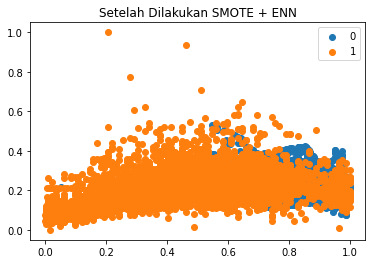

In [45]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(sampling_strategy="all")
X_enn, y_enn = enn.fit_resample(X_oversampling, y_oversampling)

viz_distribution_of_class(X_enn, y_enn, [1,8], title="Setelah Dilakukan SMOTE + ENN")

### **Process Evaluasi Model Menggunakan 10-cross-validation**

1. Tanpa Seleksi Fitur Information Gain :
    - SMOTE
    - SMOTE + TomekLink
    - SMOTE + ENN

2. Menggunakan Seleksi Fitur Information Gain :
    - SMOTE
    - SMOTE + TomekLink
    - SMOTE + ENN

Evaluasi Model berupa :
- F-measure
- ROC / AUC

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_validate

# Resampling 
oversampling = SMOTE(random_state=42)
tl = TomekLinks()


model = KNeighborsClassifier(n_neighbors=3 ,weights='distance', metric='euclidean')

pipeline_manual = Pipeline(steps = [
        ['over', oversampling],
        ['under', tl],
        ['classifier', model]
    ])


cv = KFold(n_splits=10,random_state=1, shuffle=True)
scores = cross_validate(pipeline_manual, X, y, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=cv, n_jobs=-1)

for key in scores:
    print(f"{key}: {np.mean(scores[key])}")


print('using sklearn\n')
for key in scores_sklearn:
    print(f"{key}: {np.mean(scores_sklearn[key])}")

fit_time: 0.46549010276794434
score_time: 0.08053123950958252
test_accuracy: 0.8130816162081272
test_precision: 0.11806900258491941
test_recall: 0.43940386244026486
test_f1: 0.18438465763589856
test_roc_auc: 0.6786398317650659
using sklearn

fit_time: 0.35001158714294434
score_time: 0.05208909511566162
test_accuracy: 0.8117113694792986
test_precision: 0.11955914599038431
test_recall: 0.4524553922309251
test_f1: 0.18738385534774207
test_roc_auc: 0.6824010727736531


In [11]:


# model = KNeighborsClassifier(weights='distance',metric='euclidean')

# param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# # Define grid search
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)

# # Fit grid search to training data
# grid_search.fit(X_train, y_train)

# # Get best estimator and evaluate on test data
# best_knn = grid_search.best_estimator_
# y_pred = best_knn.predict(X_test)

# confusion_matrix(y_test,y_pred)

# accuracy = best_knn.score(X_test, y_test)

# print("Accuracy:", accuracy)
# print("best knn:", best_knn)

# grid_search_df = pd.DataFrame(grid_search.cv_results_)
# grid_search_df

In [12]:
# Features Importants
# from matplotlib import pyplot

# importance = model.feat
# # summarize feature importance
# for i,v in enumerate(importance):
#  print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()